(0.0, 5000.0, -1000.0, 2000.0)

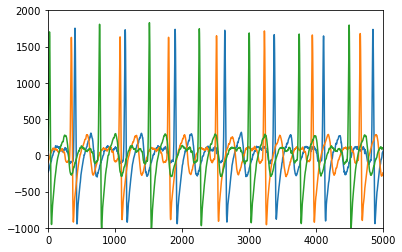

In [2]:
import os
import pandas as pd
import numpy as np
from pyecg import ECGRecord
import biosignalsnotebooks as bsnb
from numpy import linspace, diff, zeros_like, arange, array
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from scipy import signal
from scipy.signal import correlate
import neurokit2 as nk
import seaborn as sns
import scipy.fft

# We store the data so it can be plotted.
ecg_data = pd.read_csv ('/Users/jmargalef/Molecool/database/new_ecg_data/small_sample.csv')
control_data = ecg_data['Control'].tolist()
diabetic_1 = ecg_data['Diabetic_1'].tolist()
diabetic_2 = ecg_data['Diabetic_2'].tolist()
sr = 1000
time = bsnb.generate_time(control_data)

plt.plot(control_data)
plt.plot(diabetic_1)
plt.plot(diabetic_2)
plt.axis([0, 5000, -1000, 2000])


In [3]:
# R-peak detection.

_, rpeaks_2 = nk.ecg_peaks(control_data, sampling_rate=sr)
_, rpeaks_3 = nk.ecg_peaks(diabetic_1, sampling_rate=sr)
_, rpeaks_4 = nk.ecg_peaks(diabetic_2, sampling_rate=sr)

In [27]:
# We calculate the difference between two consecutive R-peaks, we do that for the whole of the signal.
peaks = pd.DataFrame(rpeaks_2)
rpeaks_hrv = peaks['ECG_R_Peaks'].tolist()
rpeaks_hrv.append('NaN')
hrv_values_c = []
for index, value in enumerate(rpeaks_hrv):
    if rpeaks_hrv[index+1] == 'NaN':
        break
    hrv_values_c.append(rpeaks_hrv[index+1]-rpeaks_hrv[index])

peaks_d1 = pd.DataFrame(rpeaks_3)
rpeaks_hrv_d1 = peaks_d1['ECG_R_Peaks'].tolist()
rpeaks_hrv_d1.append('NaN')
hrv_values_d1 = []
for index, value in enumerate(rpeaks_hrv_d1):
    if rpeaks_hrv_d1[index+1] == 'NaN':
        break
    hrv_values_d1.append(rpeaks_hrv_d1[index+1]-rpeaks_hrv_d1[index])

peaks_d2 = pd.DataFrame(rpeaks_4)
rpeaks_hrv_d2 = peaks_d2['ECG_R_Peaks'].tolist()
rpeaks_hrv_d2.append('NaN')
hrv_values_d2 = []
for index, value in enumerate(rpeaks_hrv_d2):
    if rpeaks_hrv_d2[index+1] == 'NaN':
        break
    hrv_values_d2.append(rpeaks_hrv_d2[index+1]-rpeaks_hrv_d2[index])


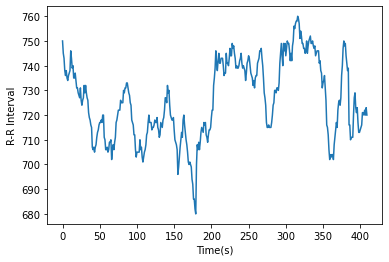

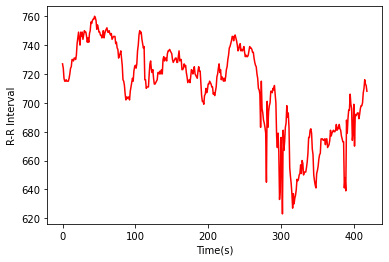

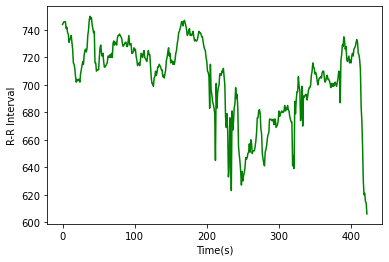

In [46]:
# Cleaning the data - threshold removing

for index, value in enumerate(hrv_values_c):
    if value < 600 or value > 780:
        del hrv_values_c[index]
for index, value in enumerate(hrv_values_d1):
    if value < 600 or value > 780:
        del hrv_values_d1[index]
for index, value in enumerate(hrv_values_d2):
    if value < 600 or value > 780:
        del hrv_values_d2[index]

plt.plot(hrv_values_c)
plt.xlabel('Time(s)')
plt.ylabel('R-R Interval')
plt.title('HRV Healthy Patient')
plt.show()
plt.plot(hrv_values_d1,'-r')
plt.xlabel('Time(s)')
plt.ylabel('R-R Interval')
plt.title('HRV Diabetic Patient 1')
plt.show()
plt.plot(hrv_values_d2,'-g')
plt.xlabel('Time(s)')
plt.ylabel('R-R Interval')
plt.title('HRV Diabetic Patient 2')
plt.show()

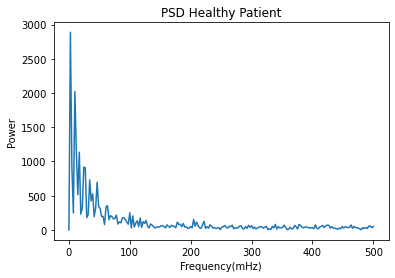

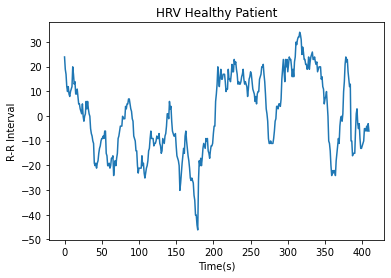

In [47]:
# Computing a FFT - fft function - Control Data
from scipy.fft import rfft, rfftfreq
from scipy.fft import irfft

time = bsnb.generate_time(hrv_values_c)
time_len = len(time)

# Number of samples in normalized_tone
N = sr * time[time_len-1]
N = int(N)

hrv_values_m = np.mean(hrv_values_c) # We calculate the mean and we subtract it from every value to normalise the signal.
hrv_fft = hrv_values_c - hrv_values_m

xf = rfftfreq(N, 1 / sr)
yf = rfft(hrv_fft)
new_signal = irfft(yf)

plt.plot(xf,np.abs(yf))
plt.xlabel('Frequency(mHz)')
plt.ylabel('Power')
plt.title('PSD Healthy Patient')
plt.show()

plt.plot(new_signal)
plt.xlabel('Time(s)')
plt.ylabel('R-R Interval')
plt.title('HRV Healthy Patient')
plt.show()

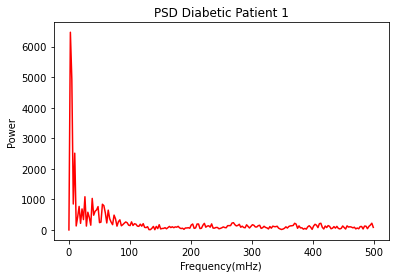

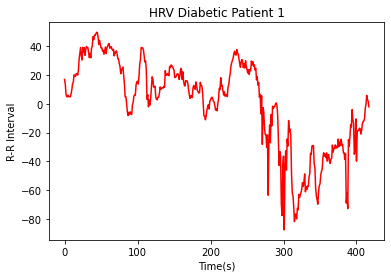

In [48]:
# Computing a FFT - fft function - Diabetic 1
from scipy.fft import rfft, rfftfreq
from scipy.fft import irfft

time = bsnb.generate_time(hrv_values_d1)
time_len = len(time)

# Number of samples in normalized_tone
N = sr * time[time_len-1]
N = int(N)

hrv_values_m = np.mean(hrv_values_d1) # We calculate the mean and we subtract it from every value to normalise the signal.
hrv_fft = hrv_values_d1 - hrv_values_m

xf = rfftfreq(N, 1 / sr)
yf = rfft(hrv_fft)
new_signal = irfft(yf)

plt.plot(xf,np.abs(yf),'-r')
plt.xlabel('Frequency(mHz)')
plt.ylabel('Power')
plt.title('PSD Diabetic Patient 1')
plt.show()

plt.plot(new_signal,'-r')
plt.xlabel('Time(s)')
plt.ylabel('R-R Interval')
plt.title('HRV Diabetic Patient 1')
plt.show()

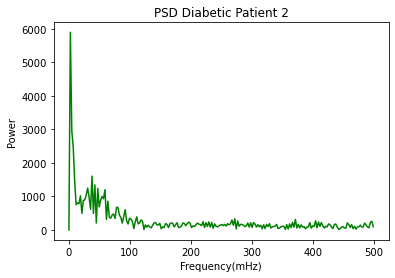

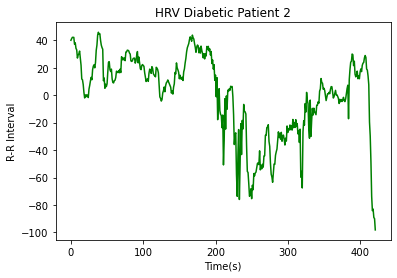

In [49]:
# Computing a FFT - fft function - Diabetic 2
from scipy.fft import rfft, rfftfreq
from scipy.fft import irfft

time = bsnb.generate_time(hrv_values_d2)
time_len = len(time)

# Number of samples in normalized_tone
N = sr * time[time_len-1]
N = int(N)

hrv_values_m = np.mean(hrv_values_d2) # We calculate the mean and we subtract it from every value to normalise the signal.
hrv_fft = hrv_values_d2 - hrv_values_m

xf = rfftfreq(N, 1 / sr)
yf = rfft(hrv_fft)
new_signal = irfft(yf)

plt.plot(xf,np.abs(yf), '-g')
plt.xlabel('Frequency(mHz)')
plt.ylabel('Power')
plt.title('PSD Diabetic Patient 2')
plt.show()

plt.plot(new_signal,'-g')
plt.xlabel('Time(s)')
plt.ylabel('R-R Interval')
plt.title('HRV Diabetic Patient 2')
plt.show()